In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import scipy as sp
from scipy import stats

In [2]:
data_df = pd.read_csv('기초 데이터.csv')

data_df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,연령,성별,학력,소득,지역,시군,동읍면,접근,역량,활용,WT,점수,연령_cut
0,0,0,0,11053,52,2,2,1,1,1,1,100,21.428571,32.820513,1.00,41.699634,10
1,1,1,1,16026,50,2,2,2,14,2,2,75,21.428571,52.051282,1.00,44.391941,10
2,2,2,2,16346,49,2,4,1,15,1,1,75,50.000000,37.820513,1.00,50.128205,9
3,3,3,3,10734,22,2,3,2,1,1,1,75,50.000000,65.128205,1.02,62.272308,4
4,4,4,4,14340,35,2,3,2,9,1,1,100,64.285714,57.051282,1.01,69.220147,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6995,6995,6995,15959,89,1,1,1,14,2,2,0,0.000000,0.000000,0.94,0.000000,11
6996,6996,6996,6996,14859,90,2,1,7,9,1,1,75,0.000000,0.000000,0.99,14.850000,11
6997,6997,6997,6997,12318,92,1,1,2,4,1,1,75,0.000000,0.000000,0.93,13.950000,11
6998,6998,6998,6998,15074,93,2,1,1,10,2,2,0,0.000000,0.000000,0.95,0.000000,11


### 성별과 점수 간 상관관계

In [3]:
data_성별_df = data_df[['성별','점수']]
data_성별_df.head()

,성별,점수
0,2,41.699634
1,2,44.391941
2,2,50.128205
3,2,62.272308
4,2,69.220147


In [5]:
how_many_성별_df = pd.DataFrame(data_성별_df['성별'].value_counts())

how_many_성별_df

# 0 : 무응답, 1 : 남성, 2 : 여성

,성별
2,3458
1,3431
0,111


<AxesSubplot:>

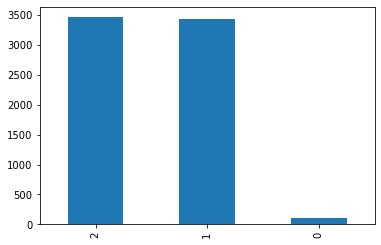

In [6]:
how_many_성별_df['성별'].plot(kind="bar")

In [7]:
pd.crosstab(data_성별_df['점수'], data_성별_df['성별'], margins=True)

성별,0,1,2,All
점수,,,,
0.0,1,20,38,59
2.7142857142857144,0,0,1,1
2.8,0,1,0,1
4.8,0,0,2,2
4.85,0,0,4,4
...,...,...,...,...
111.2,1,0,0,1
112.12307692307692,1,0,0,1
130.9230769230769,0,1,0,1


귀무가설:성별과 정보화 수준 점수는 관련이 없다.
대립가설:성별과 정보화 수준 점수는 관련이 있다.

In [16]:
stats.chisquare(data_성별_df['성별'], data_성별_df['점수'])  ### pvalue 값 계산에서 계속 오류 뜨는데 뭐 때문인지 모르겠음 ㅠ 

Power_divergenceResult(statistic=nan, pvalue=nan)

In [15]:
stats.chisquare(data_성별_df['점수'], data_성별_df['성별'])

Power_divergenceResult(statistic=nan, pvalue=nan)

### 변수 간 상관계수 파악

In [13]:
data_성별_df.corr()

# -1에 가까울수록 음의 상관관계, 1에 가까울수록 양의 상관관계, 0에 가까울수록 상관관계가 적음
# 보통 상관계수가 0.7보다 클 경우 강한 양의 상관관계가, -0.7보다 작을 경우 강한 음의 상관관계(하나가 증가할 경우 다른 하나는 감소한다)가 있다고 판단함.

,성별,점수
성별,1.000000,-0.118589
점수,-0.118589,1.000000


### 상관계수가 0에 가깝기 때문에 두 변수간 상관관계 적음